In [1]:
import numpy as np
import datetime
import tensorflow as tf

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random 

In [48]:
# Import Cifar-10 dataset
(X_train, y_train) , (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

label = [1]


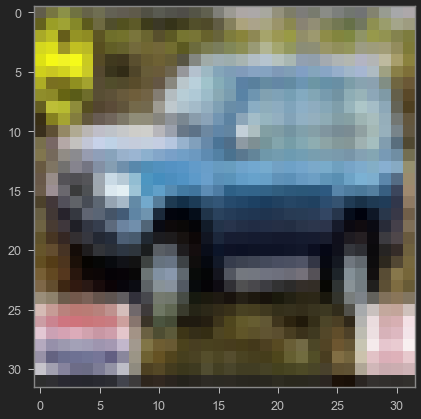

In [49]:
# Select a sample training image and visualize it
import random
i = random.randint(1, len(X_train))
plt.imshow(X_train[i])
print('label = {}'.format(y_train[i]))

label = [5]


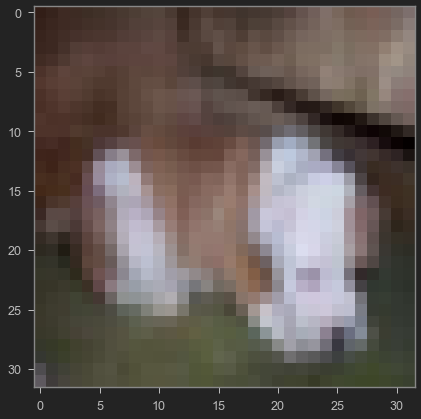

In [50]:
# Select a sample testing image and visualize it
import random
i = random.randint(1, len(X_test))
plt.imshow(X_test[i])
print('label = {}'.format(y_test[i]))

c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


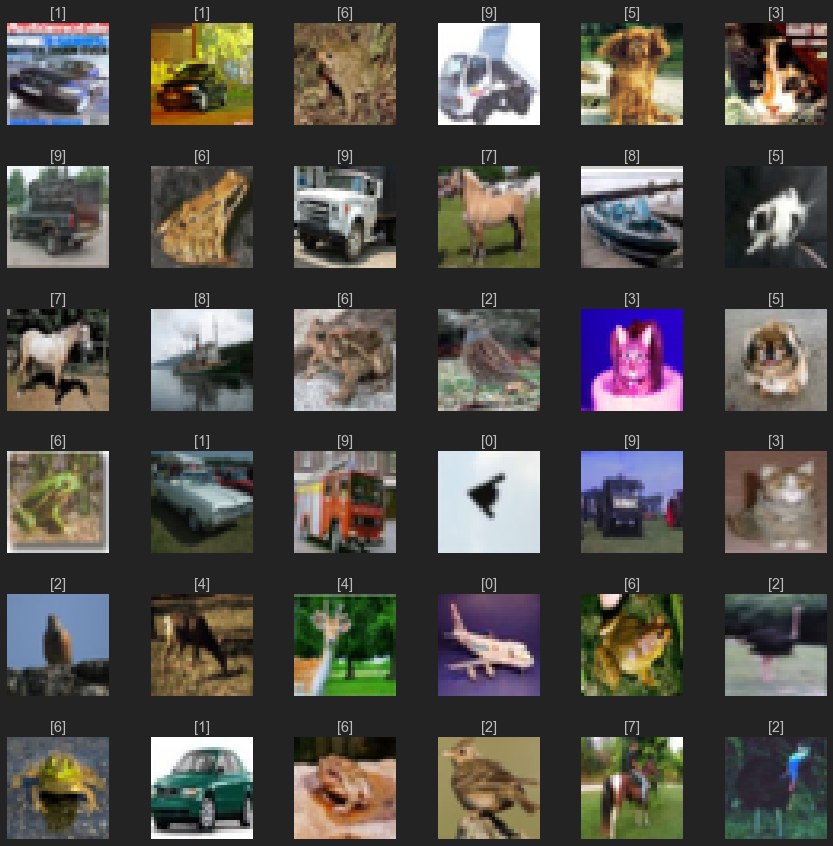

In [51]:
W_grid = 6
L_grid = 6

fig, axes = plt.subplots(L_grid, W_grid, figsize = (15, 15))
axes = axes.ravel()

n_training = len(X_train)

for i in np.arange(0, L_grid * W_grid):
    index = np.random.randint(0, n_training) # pick a random number
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index])
    axes[i].axis('off')
    
plt.subplots_adjust(hspace = 0.4)

# TASK #4: PREPARE THE DATA FOR TRAINING

In [6]:
n_training

50000

In [7]:
X_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [8]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [9]:
number_cat = 10

In [10]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [11]:
y_train = tf.keras.utils.to_categorical(y_train, number_cat)

In [12]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [13]:
y_test = tf.keras.utils.to_categorical(y_test, number_cat)

In [14]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [15]:
# Normalize pixels
X_train = X_train/255
X_test = X_test/255


In [16]:
X_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [17]:
X_train.shape

(50000, 32, 32, 3)

In [18]:
Input_shape = X_train.shape[1:]

In [19]:
Input_shape

(32, 32, 3)

In [20]:
y_train.shape

(50000, 10)

In [21]:
cnn = tf.keras.Sequential()

cnn.add(tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (32,32,3)))
cnn.add(tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'))
cnn.add(tf.keras.layers.MaxPooling2D(2,2))
cnn.add(tf.keras.layers.Dropout(0.3))


cnn.add(tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'))
cnn.add(tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'))
cnn.add(tf.keras.layers.MaxPooling2D(2,2))
cnn.add(tf.keras.layers.Dropout(0.3))

cnn.add(tf.keras.layers.Flatten())

cnn.add(tf.keras.layers.Dense(1024, activation = 'relu'))
cnn.add(tf.keras.layers.Dropout(0.3))

cnn.add(tf.keras.layers.Dense(1024, activation = 'relu'))

cnn.add(tf.keras.layers.Dense(10, activation = 'softmax'))
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0

In [22]:
cnn.compile(optimizer = tf.keras.optimizers.adam(0.0001), loss ='categorical_crossentropy', metrics =['accuracy'])

In [23]:
epochs = 1

history = cnn.fit(X_train, y_train, batch_size = 512, epochs = epochs)


Train on 50000 samples
50000/50000 [==============================] - 224s 4ms/sample - loss: 2.1481 - accuracy: 0.2031


In [31]:
# serialize model to JSON
model_json = cnn.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
cnn.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [32]:
# load json and create model

from tensorflow.keras.models import model_from_json

json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
cnn = model_from_json(loaded_model_json)
# load weights into new model
cnn.load_weights("cifar10_trained_model.h5")
print("Loaded model from disk")

Loaded model from disk


In [33]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0

In [34]:
X_test.shape

(10000, 32, 32, 3)

In [35]:
y_test.shape

(10000, 10)

In [36]:
# evaluate loaded model on test data
cnn.compile(optimizer = tf.keras.optimizers.adam(0.0001), loss ='categorical_crossentropy', metrics =['accuracy'])

In [37]:
evaluation = cnn.evaluate(X_test, y_test)
print('Test Accuracy: {}'.format(evaluation[1]))

10000/10000 [==============================] - 15s 1ms/sample - loss: 0.6917 - accuracy: 0.7712
Test Accuracy: 0.7712000012397766


In [38]:
evaluation = cnn.evaluate(X_test, y_test)
print('Test Accuracy: {}'.format(evaluation[1]))

10000/10000 [==============================] - 16s 2ms/sample - loss: 0.6917 - accuracy: 0.7712
Test Accuracy: 0.7712000012397766


In [39]:
predicted_classes = cnn.predict(X_test) 
predicted_classes

array([[7.52741253e-05, 1.47322752e-03, 9.80154797e-03, ...,
        4.67839680e-04, 2.21026083e-03, 5.45002462e-04],
       [5.11053309e-04, 1.43843598e-03, 2.32147546e-08, ...,
        5.75242354e-10, 9.97894704e-01, 1.55697562e-04],
       [3.95725016e-03, 1.18881725e-02, 1.06147963e-04, ...,
        7.60501234e-06, 9.74000752e-01, 9.97036695e-03],
       ...,
       [2.57443258e-08, 2.47221212e-08, 9.02542160e-05, ...,
        5.69794094e-04, 1.07969214e-07, 6.89602047e-08],
       [1.09294029e-02, 9.80217576e-01, 2.21437705e-03, ...,
        5.34709689e-05, 8.55867984e-05, 1.58488948e-03],
       [1.27285873e-07, 3.27512204e-08, 1.92148818e-05, ...,
        9.89549041e-01, 1.71643407e-07, 1.13096382e-06]], dtype=float32)

In [40]:
predicted_classes = predicted_classes.argmax(1)

In [41]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [42]:
y_test = y_test.argmax(1)

In [43]:
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

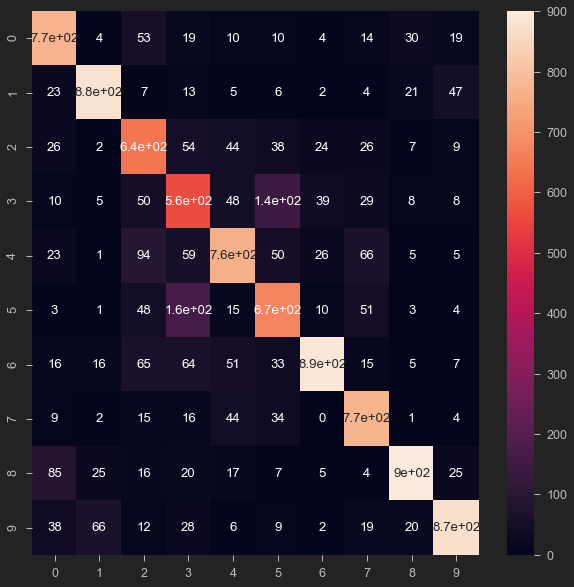

In [52]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(predicted_classes, y_test)
cm
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True)

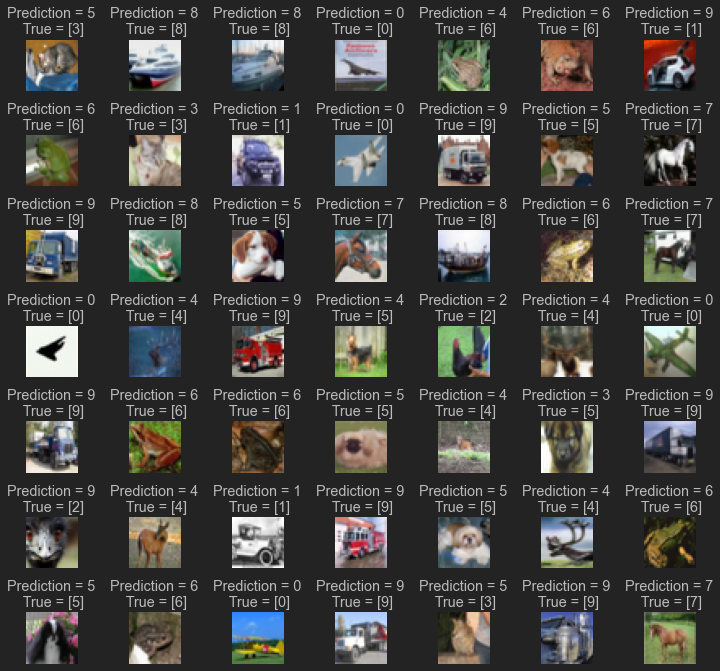

In [53]:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1) 